# Import de fonctions

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import sys

# import UCSL github : Unsupervised Clustering driven by Supervised Learning 
!git clone -b sklearn_update https://github.com/rlouiset/py_ucsl > /dev/null 2>&1

"-b sklearn_update "

sys.path.append('./py_ucsl/')
from ucsl.ucsl_classifier import *
from ucsl.ucsl_regressor import *

# Import data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


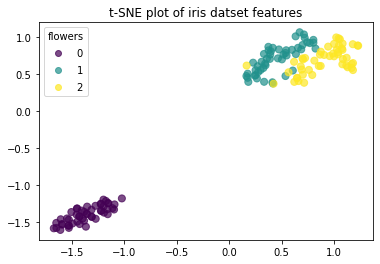

In [2]:
# load iris dataset
iris = load_iris()
X_train = iris.data

# normalize training features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = iris.target

# project both on tSNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne = scaler.fit_transform(X_train_tsne)

# plot t-SNE feature projection
fig, ax = plt.subplots()
labels_map = {0:"Setosa", 1: "Versicolor", 2:"Virginica"}
labels = [labels_map[y_i] for y_i in y_train]
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=50, alpha=0.7, label=labels)
ax.legend(*scatter.legend_elements(), title="flowers")
plt.title("t-SNE plot of iris datset features")
plt.show()

# Iris unsupervised classification

In [3]:
# one by one separate one flower form the two other, cluster the two other and check the supervised metrics
for neg_label in [0, 1, 2] :
  if neg_label == 0 :
    pos_label=1
    training_label_mapping={0:0, 1:1, 2:1}
    mapping={0:None, 1:1, 2:0}
  if neg_label == 1 :
    pos_label=0
    training_label_mapping={0:0, 1:1, 2:0}
    mapping={0:0, 1:None, 2:1}
  if neg_label == 2 :
    pos_label=0
    training_label_mapping={0:0, 1:0, 2:1}
    mapping={0:0, 1:1, 2:None}

  print("The label not to cluster is : ", neg_label)

  # UCSL training
  UCSL_method = UCSL_C(training_label_mapping=training_label_mapping, n_clusters=2, label_to_cluster=pos_label,
                      clustering="full_gaussian_mixture", maximization="linear")
  UCSL_method = UCSL_method.fit(X_train, y_train)

  # KMeans training
  KMeans_method = KMeans(n_clusters=2)
  KMeans_method = KMeans_method.fit(X_train[y_train!=neg_label])

  # GaussianMixture training
  GaussianMixture_method = GaussianMixture(n_components=2)
  GaussianMixture_method = GaussianMixture_method.fit(X_train[y_train!=neg_label])

  # DBSCAN training
  DBSCAN_method = DBSCAN()
  DBSCAN_method = DBSCAN_method.fit(X_train[y_train!=neg_label])

  # Agglomerative Clustering training
  AgglomerativeClustering_method = AgglomerativeClustering(n_clusters=2)
  AgglomerativeClustering_method = AgglomerativeClustering_method.fit(X_train[y_train!=neg_label])

  # SVM training
  SVM_method = SVC()
  ground_truth = y_train[y_train!=(neg_label)]
  ground_truth = [mapping[i] for i in ground_truth]
  SVM_method = SVM_method.fit(X_train[y_train!=neg_label], ground_truth)

  ##############################################################################

  # UCSL predictions
  y_ones, y_pred = UCSL_method.predict(X_train, pos_label*np.ones(len(X_train)))
  predictions = y_pred[y_train!=(neg_label)]
  ground_truth = y_train[y_train!=(neg_label)]
  ground_truth = [mapping[i] for i in ground_truth]
  print("UCSL : ", max(accuracy_score(ground_truth, predictions), accuracy_score(ground_truth, 1-predictions)))

  # KMeans predictions
  y_pred = KMeans_method.predict(X_train)
  predictions = y_pred[y_train!=(neg_label)]
  ground_truth = y_train[y_train!=(neg_label)]
  ground_truth = [mapping[i] for i in ground_truth]
  print("KMeans : ", max(accuracy_score(ground_truth, predictions), accuracy_score(ground_truth, 1-predictions)))

  # GaussianMixture predictions
  y_pred = GaussianMixture_method.predict(X_train)
  predictions = y_pred[y_train!=(neg_label)]
  ground_truth = y_train[y_train!=(neg_label)]
  ground_truth = [mapping[i] for i in ground_truth]
  print("GaussianMixture : ", max(accuracy_score(ground_truth, predictions), accuracy_score(ground_truth, 1-predictions)))

  # DBSCAN predictions
  y_pred = DBSCAN_method.fit_predict(X_train[y_train!=(neg_label)])
  predictions = y_pred
  ground_truth = y_train[y_train!=(neg_label)]
  ground_truth = [mapping[i] for i in ground_truth]
  print("DBSCAN : ", max(accuracy_score(ground_truth, predictions), accuracy_score(ground_truth, 1-predictions)))

  # AgglomerativeClustering predictions
  y_pred = AgglomerativeClustering_method.fit_predict(X_train[y_train!=(neg_label)])
  predictions = y_pred
  ground_truth = y_train[y_train!=(neg_label)]
  ground_truth = [mapping[i] for i in ground_truth]
  print("AgglomerativeClustering : ", max(accuracy_score(ground_truth, predictions), accuracy_score(ground_truth, 1-predictions)))

  # SVM predictions
  y_pred = SVM_method.predict(X_train)
  predictions = y_pred[y_train!=(neg_label)]
  ground_truth = y_train[y_train!=(neg_label)]
  ground_truth = [mapping[i] for i in ground_truth]
  print("SVM : ", max(accuracy_score(ground_truth, predictions), accuracy_score(ground_truth, 1-predictions)))

  print('--------------------------------------------------------------------')

The label not to cluster is :  0
UCSL :  0.87
KMeans :  0.75
GaussianMixture :  0.95
DBSCAN :  0.39
AgglomerativeClustering :  0.76
SVM :  0.96
--------------------------------------------------------------------
The label not to cluster is :  1
UCSL :  1.0
KMeans :  1.0
GaussianMixture :  1.0
DBSCAN :  0.64
AgglomerativeClustering :  1.0
SVM :  1.0
--------------------------------------------------------------------
The label not to cluster is :  2
UCSL :  1.0
KMeans :  1.0
GaussianMixture :  1.0
DBSCAN :  0.82
AgglomerativeClustering :  0.99
SVM :  1.0
--------------------------------------------------------------------
